In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import os, shutil

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [5]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [18]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.ordinal import OrdinalEncoder

#ML
from sklearn.svm import SVC, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

#stacking
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, StackingRegressor

# ensemble(bagging)
from sklearn.ensemble import ( 
  BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
)

# 교차검증
from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss

In [6]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.5 MB/s 


In [ ]:
def preprocess(data):
  #의미없는 컬럼 삭제
  data=data.drop(['PassengerId','Name', 'Ticket'], axis=1)

  #인코딩
  le = LabelEncoder()
  data['Sex'] = le.fit_transform(data['Sex'])
  data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

  #요금 로그
  data['Fare_log']=np.log1p(data['Fare'])
  data=data.drop(['Fare'], axis=1)

  #가족
  data['Famsize']=data['Parch']+data['SibSp']

  #새로운 변수
  data['ID1']=data['Pclass'].astype(str)+data['Sex'].astype(str)
  data['ID2']=data['Sex'].astype(str)+data['Age'].astype(str)
  data['ID1']=data['ID1'].astype(int)
  data['ID2']=data['ID2'].astype(float)

  return data

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/rawdata.csv')
test=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/testprepro.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,11.0,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,32.0,0,0,359309,8.0500,S


In [ ]:
train=preprocess(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2
0,0,3,1,22.0,1,0,0,2.110213,1,31,122.0
1,1,1,0,38.0,1,0,1,4.280593,1,10,38.0
2,1,3,0,26.0,0,0,0,2.188856,0,30,26.0
3,1,1,0,35.0,1,0,0,3.990834,1,10,35.0
4,0,3,1,35.0,0,0,0,2.202765,0,31,135.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,0,2.639057,0,21,127.0
885,1,1,0,19.0,0,0,0,3.433987,0,10,19.0
886,0,3,0,11.0,1,2,0,3.196630,3,30,11.0
887,1,1,1,26.0,0,0,1,3.433987,0,11,126.0


## XGBoost

In [ ]:
x=train.drop(columns=['Survived','Age','SibSp','Parch'])
y=train['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
params={
    'num_boost_rounds': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'objective': ['binary:hinge','binary:logistic']
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=12)
results=search.fit(x_train, y_train)

print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'max_depth': 3, 'num_boost_rounds': 100, 'objective': 'binary:logistic'}
0.8750550220088035


In [ ]:
params={
    'num_boost_rounds': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'objective': ['binary:hinge','binary:logistic']
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=15)
results=search.fit(x_train, y_train)

print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'max_depth': 3, 'num_boost_rounds': 100, 'objective': 'binary:logistic'}
0.8578056737098133


In [ ]:
params={
    'num_boost_rounds': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9,11],
    'objective': ['binary:logistic'],
    'seed' : [42,2022],
    'lambda' : [0.03, 0.05, 0.07],
    'subsample' : [0.6,0.7,0.8,0.9],
    'min_child_weight' : [3,5,7] 
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=10)
results=search.fit(x_train, y_train)

print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'lambda': 0.03, 'max_depth': 7, 'min_child_weight': 5, 'num_boost_rounds': 100, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.7}
0.8689451219512195


In [ ]:
xgb_params = {
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'max_depth' : 7,
    'min_child_weight' : 5,    
    'learning_rate' : 0.02,    
    'subsample' : 0.7,
    'lambda' : 0.03,
    'alpha' : 1,    
    'seed' : 42,
    'num_boost_rounds': 100,
}

model=xgb.XGBClassifier(**xgb_params, cv=10)
model.fit(x_train, y_train, early_stopping_rounds = 200, eval_metric = 'logloss', eval_set = [(x_val, y_val)])

[0]	validation_0-logloss:0.684393
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.676122
[2]	validation_0-logloss:0.667736
[3]	validation_0-logloss:0.659662
[4]	validation_0-logloss:0.652319
[5]	validation_0-logloss:0.645072
[6]	validation_0-logloss:0.638471
[7]	validation_0-logloss:0.631717
[8]	validation_0-logloss:0.625242
[9]	validation_0-logloss:0.619212
[10]	validation_0-logloss:0.613055
[11]	validation_0-logloss:0.6075
[12]	validation_0-logloss:0.601328
[13]	validation_0-logloss:0.596051
[14]	validation_0-logloss:0.590805
[15]	validation_0-logloss:0.585692
[16]	validation_0-logloss:0.580781
[17]	validation_0-logloss:0.576222
[18]	validation_0-logloss:0.571511
[19]	validation_0-logloss:0.566727
[20]	validation_0-logloss:0.562406
[21]	validation_0-logloss:0.558424
[22]	validation_0-logloss:0.555157
[23]	validation_0-logloss:0.551
[24]	validation_0-logloss:0.54714
[25]	validation_0-logloss:0.54318
[26]	validation_0-logloss:0.539443
[27

XGBClassifier(alpha=1, cv=10, eval_metric='logloss', lambda=0.03,
              learning_rate=0.02, max_depth=7, min_child_weight=5,
              num_boost_rounds=100, seed=42, subsample=0.7)

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       438
           1       0.86      0.76      0.81       273

    accuracy                           0.86       711
   macro avg       0.86      0.84      0.85       711
weighted avg       0.86      0.86      0.86       711

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       111
           1       0.77      0.70      0.73        67

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
yhat_train=best_model.predict(x_train)
yhat_val=best_model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       414
           1       0.89      0.81      0.85       252

    accuracy                           0.89       666
   macro avg       0.89      0.87      0.88       666
weighted avg       0.89      0.89      0.89       666

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       135
           1       0.82      0.74      0.78        88

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



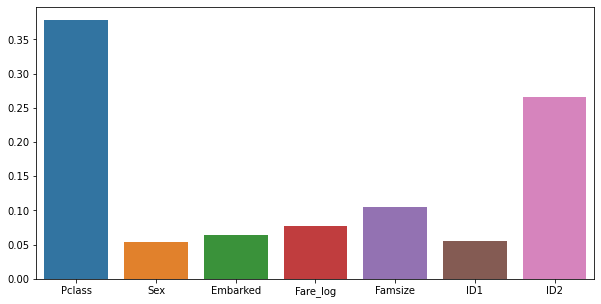

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, best_model.feature_importances_)

# 변수생성 set2

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/rawdata.csv')
test=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/testprepro.csv')

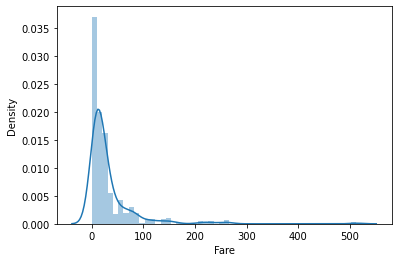

In [ ]:
sns.distplot(train.Fare)

In [ ]:
np.median(train.Fare)

14.4542

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [ ]:
#구간화 함수
def make_bin(data,variable, n):
  count,bin_dividers=np.histogram(data[variable], bins=n)
  bin_names=[str(i) for i in range(n)]
  data[variable]=pd.cut(x=data[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
  data[variable]=label_encoder.fit_transform(data[variable])

In [ ]:
def preprocess_set2(data):
  #의미없는 컬럼 삭제
  data=data.drop(['PassengerId','Name', 'Ticket'], axis=1)

  #인코딩
  le = LabelEncoder()
  data['Sex'] = le.fit_transform(data['Sex'])
  data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

  #나이 정수형
  data.Age=data.Age.astype(int)

  #요금 로그
  data['Fare_log']=np.log1p(data['Fare'])
  data=data.drop(['Fare'], axis=1)

  #가족
  data['Famsize']=data['Parch']+data['SibSp']

  #새로운 변수
  data['ID1']=data['Pclass'].astype(str)+data['Embarked'].astype(str)
  data['ID2']=data['Sex'].astype(str)+data['Age'].astype(str)+data['Famsize'].astype(str)
  data['ID1']=data['ID1'].astype(int)
  data['ID2']=data['ID2'].astype(int)

  return data

In [ ]:
train=preprocess_set2(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2
0,0,3,1,22,1,0,0,2.110213,1,30,1221
1,1,1,0,38,1,0,1,4.280593,1,11,381
2,1,3,0,26,0,0,0,2.188856,0,30,260
3,1,1,0,35,1,0,0,3.990834,1,10,351
4,0,3,1,35,0,0,0,2.202765,0,30,1350
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27,0,0,0,2.639057,0,20,1270
885,1,1,0,19,0,0,0,3.433987,0,10,190
886,0,3,0,11,1,2,0,3.196630,3,30,113
887,1,1,1,26,0,0,1,3.433987,0,11,1260


In [ ]:
make_bin(train, 'Age', n=8)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2
0,0,3,1,2,1,0,0,2.110213,1,30,1221
1,1,1,0,3,1,0,1,4.280593,1,11,381
2,1,3,0,2,0,0,0,2.188856,0,30,260
3,1,1,0,3,1,0,0,3.990834,1,10,351
4,0,3,1,3,0,0,0,2.202765,0,30,1350
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,2,0,0,0,2.639057,0,20,1270
885,1,1,0,1,0,0,0,3.433987,0,10,190
886,0,3,0,1,1,2,0,3.196630,3,30,113
887,1,1,1,2,0,0,1,3.433987,0,11,1260


In [ ]:
test=preprocess_set2(test)
make_bin(test, 'Age', n=8)
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2
0,3,1,3,0,0,2,2.178064,0,32,1340
1,3,0,4,1,0,0,2.079442,1,30,471
2,2,1,6,0,0,2,2.369075,0,22,1620
3,3,1,2,0,0,0,2.268252,0,30,1270
4,3,0,2,1,1,0,2.586824,2,30,222
...,...,...,...,...,...,...,...,...,...,...
413,3,1,3,0,0,0,2.202765,0,30,1320
414,1,0,4,0,0,1,4.699571,0,11,390
415,3,1,3,0,0,0,2.110213,0,30,1380
416,3,1,3,0,0,0,2.202765,0,30,1320


In [ ]:
x=train.drop(columns=['Survived'])
y=train['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
model = cb.CatBoostClassifier().fit(x_train, y_train)

Learning rate set to 0.008661
0:	learn: 0.6870262	total: 1.16ms	remaining: 1.16s
1:	learn: 0.6806112	total: 2.04ms	remaining: 1.02s
2:	learn: 0.6748443	total: 2.89ms	remaining: 962ms
3:	learn: 0.6694235	total: 3.68ms	remaining: 917ms
4:	learn: 0.6632498	total: 5.38ms	remaining: 1.07s
5:	learn: 0.6573962	total: 7.82ms	remaining: 1.29s
6:	learn: 0.6521023	total: 18ms	remaining: 2.55s
7:	learn: 0.6478526	total: 19.7ms	remaining: 2.44s
8:	learn: 0.6420532	total: 21.4ms	remaining: 2.35s
9:	learn: 0.6368385	total: 24ms	remaining: 2.37s
10:	learn: 0.6314895	total: 26.8ms	remaining: 2.41s
11:	learn: 0.6268546	total: 29.3ms	remaining: 2.41s
12:	learn: 0.6223371	total: 30.5ms	remaining: 2.31s
13:	learn: 0.6175469	total: 37.9ms	remaining: 2.67s
14:	learn: 0.6129467	total: 39ms	remaining: 2.56s
15:	learn: 0.6086403	total: 40.1ms	remaining: 2.46s
16:	learn: 0.6038560	total: 41.2ms	remaining: 2.38s
17:	learn: 0.5997046	total: 42.4ms	remaining: 2.31s
18:	learn: 0.5957742	total: 43.8ms	remaining: 2.26

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)

print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       397
           1       0.93      0.86      0.89       269

    accuracy                           0.92       666
   macro avg       0.92      0.91      0.91       666
weighted avg       0.92      0.92      0.92       666

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       152
           1       0.76      0.73      0.75        71

    accuracy                           0.84       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



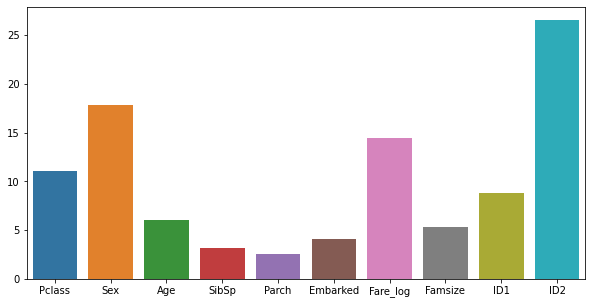

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, model.feature_importances_)

In [ ]:
params={
    'num_boost_rounds': [100, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'objective': ['binary:logistic'],
    'seed' : [42], 
    'lambda' : [0.03, 0.05, 0.07],
    'subsample' : [0.6,0.7,0.8,0.9],
    'min_child_weight' : [3,5,7] 
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=10)
results=search.fit(x_train, y_train)

print( results.best_params_ )
print( results.best_score_ )
best_model = results.best_estimator_

{'lambda': 0.03, 'max_depth': 5, 'min_child_weight': 5, 'num_boost_rounds': 100, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.8}
0.883374723145072


In [ ]:
yhat_train=best_model.predict(x_train)
yhat_val=best_model.predict(x_val)

print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       424
           1       0.90      0.81      0.85       242

    accuracy                           0.90       666
   macro avg       0.90      0.88      0.89       666
weighted avg       0.90      0.90      0.90       666

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       125
           1       0.80      0.78      0.79        98

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



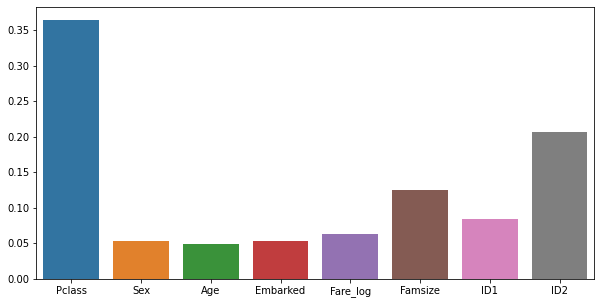

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, best_model.feature_importances_)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import glob
import pandas as pd
import numpy as np

from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
import random

import optuna
from optuna.samplers import TPESampler

In [ ]:
n_est = 2000
seed = 42
n_fold = 15
n_class = 2

target = 'Survived'
X = train.drop(target, axis=1)
y = train[target]
X_test = test
cat_cols = ['Pclass','Sex','Age','SibSp','Parch','Embarked','Famsize','ID1','ID2']

In [ ]:
skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
folds=[]
acc_avg = []

for train_idx, valid_idx in skfold.split(X, y):
    folds.append((train_idx, valid_idx))

cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['Pclass','Sex','Age','SibSp','Parch','Embarked','Famsize','ID1','ID2']

for fold in range(n_fold):
    print(f'\n----------------- Fold {fold} -----------------\n')
  
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
    train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)
    model_cat = CatBoostClassifier()
    model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=200, verbose=100)
    
    cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
    cat_pred_test += model_cat.predict_proba(X_test) / n_fold
    print(f'ACC Score: {accuracy_score(model_cat.predict(X_valid),y_valid ):.6f}')
    
#print(f'\t ACC: {accuracy_score(y, cat_pred):.6f}')




----------------- Fold 0 -----------------

Learning rate set to 0.030255
0:	learn: 0.6759757	test: 0.6744808	best: 0.6744808 (0)	total: 5.83ms	remaining: 5.82s
100:	learn: 0.3673069	test: 0.3603581	best: 0.3603581 (100)	total: 1.03s	remaining: 9.18s
200:	learn: 0.3264559	test: 0.3502406	best: 0.3488994 (171)	total: 2.03s	remaining: 8.07s
300:	learn: 0.2942581	test: 0.3503532	best: 0.3465125 (244)	total: 3.06s	remaining: 7.12s
400:	learn: 0.2667272	test: 0.3468835	best: 0.3457402 (365)	total: 3.96s	remaining: 5.91s
500:	learn: 0.2393603	test: 0.3416642	best: 0.3411245 (476)	total: 4.41s	remaining: 4.39s
600:	learn: 0.2155035	test: 0.3331746	best: 0.3330346 (599)	total: 4.88s	remaining: 3.24s
700:	learn: 0.1965373	test: 0.3341694	best: 0.3320791 (643)	total: 5.34s	remaining: 2.28s
800:	learn: 0.1778576	test: 0.3394509	best: 0.3320791 (643)	total: 5.81s	remaining: 1.44s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.3320790699
bestIteration = 643

Shrink model to f

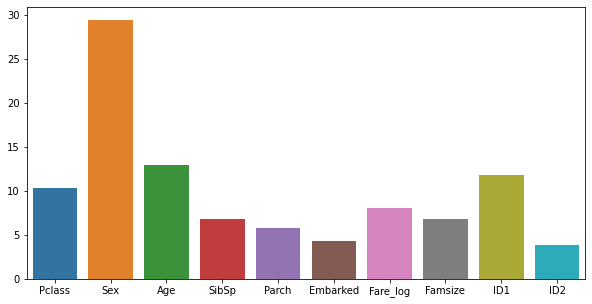

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(X_valid.columns, model_cat.feature_importances_)

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Famsize,ID1,ID2,ID3
0,0,3,1,2,1,0,0,2.110213,1,30,1221,31201
1,1,1,0,3,1,0,1,4.280593,1,11,381,10311
2,1,3,0,2,0,0,0,2.188856,0,30,260,30200
3,1,1,0,3,1,0,0,3.990834,1,10,351,10301
4,0,3,1,3,0,0,0,2.202765,0,30,1350,31300
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,2,0,0,0,2.639057,0,20,1270,21200
885,1,1,0,1,0,0,0,3.433987,0,10,190,10100
886,0,3,0,1,1,2,0,3.196630,3,30,113,30103
887,1,1,1,2,0,0,1,3.433987,0,11,1260,11210


In [ ]:
x=train.drop(columns=['Survived'])
y=train['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=15, shuffle=True)

In [ ]:
xgb_params={
    'num_boost_rounds': [50,70,100, 300],
    'max_depth': [3, 5, 7, 9,11],
    'objective': ['binary:logistic'],
    'seed' : [42],
    'lambda' : [0.03, 0.05, 0.07],
    'subsample' : [0.6,0.7,0.8,0.9],
    'min_child_weight' : [3,5,7] 
}

model=xgb.XGBClassifier()
search=GridSearchCV(model, param_grid=xgb_params, scoring='roc_auc', cv=10)
results=search.fit(x_train, y_train)

print( results.best_params_ )
print( results.best_score_ )
xgb_best_model = results.best_estimator_

{'lambda': 0.03, 'max_depth': 3, 'min_child_weight': 3, 'num_boost_rounds': 50, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.9}
0.8731718898385564


In [ ]:
yhat_train=xgb_best_model.predict(x_train)
yhat_val=xgb_best_model.predict(x_val)
print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       398
           1       0.91      0.79      0.85       268

    accuracy                           0.88       666
   macro avg       0.89      0.87      0.88       666
weighted avg       0.89      0.88      0.88       666

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       151
           1       0.74      0.72      0.73        72

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.83      0.83      0.83       223



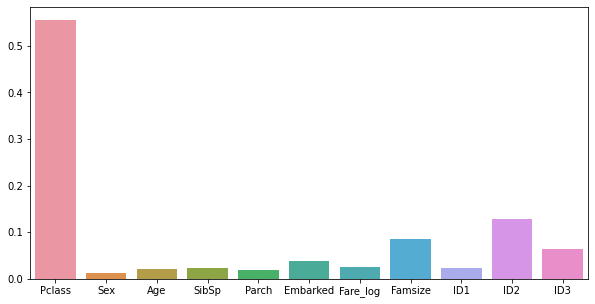

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, xgb_best_model.feature_importances_)

In [ ]:
lgbm_params = {
  'learning_rate': [0.01, 0.07, 0.005, 0.003],
  'num_iterations ': [80,100,200],
  'max_depth': [1, 3, 5, 7, 9],
  'objective': ['binary']
}

model = lgb.LGBMClassifier()
search = GridSearchCV( model, param_grid=lgbm_params, scoring='roc_auc', cv=15)
results = search.fit( x_train, y_train )

print( results.best_params_ )
print( results.best_score_ )
lgbm_best_model = results.best_estimator_

{'learning_rate': 0.07, 'max_depth': 1, 'num_iterations ': 80, 'objective': 'binary'}
0.8804079846563508


In [ ]:
yhat_train=lgbm_best_model.predict(x_train)
yhat_val=lgbm_best_model.predict(x_val)
print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       398
           1       0.84      0.73      0.78       268

    accuracy                           0.84       666
   macro avg       0.84      0.82      0.83       666
weighted avg       0.84      0.84      0.84       666

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       151
           1       0.72      0.74      0.73        72

    accuracy                           0.82       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



In [ ]:
rf_params={
  'criterion': ['gini', 'entropy'],
  'n_estimators': [50, 80, 100, 300],
  'max_depth': [1,3, 5, 7, 9, 11, 13],
  'min_samples_split': [8, 16, 20],
  'min_samples_leaf': [8, 12, 18],   

}

model= RandomForestClassifier()
search=GridSearchCV(model, param_grid=rf_params, scoring='roc_auc', cv=10)
results=search.fit(x_train, y_train)

print( results.best_params_ )
print( results.best_score_ )
rf_best_model = results.best_estimator_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}
0.8798824786324786


In [ ]:
yhat_train=rf_best_model.predict(x_train)
yhat_val=rf_best_model.predict(x_val)
print(classification_report(y_train, yhat_train))
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       398
           1       0.89      0.73      0.80       268

    accuracy                           0.86       666
   macro avg       0.87      0.84      0.85       666
weighted avg       0.86      0.86      0.85       666

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       151
           1       0.75      0.71      0.73        72

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.83      0.83      0.83       223



In [ ]:
estimators = [
  ('RandomForest', RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8, min_samples_split=8, n_estimators=50) ),
  ('XGBoost', xgb.XGBClassifier(max_depth=3, min_child_weight=3, num_boost_rounds=50, objective='binary:logistic', seed=42, subsample=0.9) ), 
  ('LGBM', lgb.LGBMClassifier(learning_rate= 0.07, max_depth=1, num_iterations =80, objective= 'binary') ),
  ('CB', cb.CatBoostClassifier() )
]

model = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression() )
model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_val = model.predict(x_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 0.6679030	total: 6.59ms	remaining: 1.31s
5:	learn: 0.6625570	total: 7.84ms	remaining: 1.3s
6:	learn: 0.6571156	total: 9.05ms	remaining: 1.28s
7:	learn: 0.6527872	total: 11.1ms	remaining: 1.38s
8:	learn: 0.6474977	total: 12.8ms	remaining: 1.41s
9:	learn: 0.6429383	total: 16.1ms	remaining: 1.59s
10:	learn: 0.6380919	total: 17ms	remaining: 1.53s
11:	learn: 0.6335141	total: 18.3ms	remaining: 1.51s
12:	learn: 0.6292231	total: 19.6ms	remaining: 1.49s
13:	learn: 0.6247092	total: 20.8ms	remaining: 1.47s
14:	learn: 0.6204063	total: 22.1ms	remaining: 1.45s
15:	learn: 0.6160340	total: 23.2ms	remaining: 1.43s
16:	learn: 0.6122123	total: 24.1ms	remaining: 1.4s
17:	learn: 0.6083423	total: 25.4ms	remaining: 1.38s
18:	learn: 0.6052185	total: 26.4ms	remaining: 1.36s
19:	learn: 0.6012975	total: 27.6ms	remaining: 1.35s
20:	learn: 0.5969420	total: 29.1ms	remaining: 1.36s
21:	learn: 0.5929404	total: 30.4ms	remaining: 1.35s
22:	learn: 0.5894528	total: 31.7ms	rem

In [ ]:
print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       398
           1       0.86      0.76      0.81       268

    accuracy                           0.85       666
   macro avg       0.86      0.84      0.85       666
weighted avg       0.86      0.85      0.85       666

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       151
           1       0.70      0.74      0.72        72

    accuracy                           0.81       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



# Set3

In [15]:
train=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/rawdata.csv')
test=pd.read_csv('/content/drive/MyDrive/dacon/타이타닉/data/testprepro.csv')

In [12]:
def preprocess_set3(data):
  #의미없는 컬럼 삭제
  data=data.drop(['PassengerId','Name'], axis=1)

  #인코딩
  le = LabelEncoder()
  data['Sex'] = le.fit_transform(data['Sex'])
  data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

  #나이 정수형
  data.Age=data.Age.astype(int)

  #Fare
  data['Fare_log']=np.log1p(data['Fare'])
  data['Fare_dev'] = abs(data['Fare'] - data['Fare'].mean())


  #가족
  data['Famsize']=data['Parch']+data['SibSp']

  #새로운 변수
  data['ship']=data['Pclass'].astype(str)+data['Embarked'].astype(str)
  data['person_info']=data['Sex'].astype(str)+data['Age'].astype(str)+data['Famsize'].astype(str)
  data['ID']=data['Pclass'].astype(str)+data['Sex'].astype(str)+data['Age'].astype(str)+data['Ticket'].astype(str)


  return data

In [20]:
#구간화 함수
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
def make_bin(data,variable, n):
  count,bin_dividers=np.histogram(data[variable], bins=n)
  bin_names=[str(i) for i in range(n)]
  data[variable+'_bin']=pd.cut(x=data[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
  data[variable+'_bin']=label_encoder.fit_transform(data[variable+'_bin'])

In [16]:
train=preprocess_set3(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log,Fare_dev,Famsize,ship,person_info,ID
0,0,3,1,22,1,0,A/5 21171,7.2500,0,2.110213,24.846681,1,30,1221,3122A/5 21171
1,1,1,0,38,1,0,PC 17599,71.2833,1,4.280593,39.186619,1,11,0381,1038PC 17599
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,0,2.188856,24.171681,0,30,0260,3026STON/O2. 3101282
3,1,1,0,35,1,0,113803,53.1000,0,3.990834,21.003319,1,10,0351,1035113803
4,0,3,1,35,0,0,373450,8.0500,0,2.202765,24.046681,0,30,1350,3135373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27,0,0,211536,13.0000,0,2.639057,19.096681,0,20,1270,2127211536
885,1,1,0,19,0,0,112053,30.0000,0,3.433987,2.096681,0,10,0190,1019112053
886,0,3,0,11,1,2,W./C. 6607,23.4500,0,3.196630,8.646681,3,30,0113,3011W./C. 6607
887,1,1,1,26,0,0,111369,30.0000,1,3.433987,2.096681,0,11,1260,1126111369


In [21]:
make_bin(train, 'Age', n=10)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log,Fare_dev,Famsize,ship,person_info,ID,Age_bin
0,0,3,1,22,1,0,A/5 21171,7.2500,0,2.110213,24.846681,1,30,1221,3122A/5 21171,2
1,1,1,0,38,1,0,PC 17599,71.2833,1,4.280593,39.186619,1,11,0381,1038PC 17599,4
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,0,2.188856,24.171681,0,30,0260,3026STON/O2. 3101282,3
3,1,1,0,35,1,0,113803,53.1000,0,3.990834,21.003319,1,10,0351,1035113803,4
4,0,3,1,35,0,0,373450,8.0500,0,2.202765,24.046681,0,30,1350,3135373450,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27,0,0,211536,13.0000,0,2.639057,19.096681,0,20,1270,2127211536,3
885,1,1,0,19,0,0,112053,30.0000,0,3.433987,2.096681,0,10,0190,1019112053,2
886,0,3,0,11,1,2,W./C. 6607,23.4500,0,3.196630,8.646681,3,30,0113,3011W./C. 6607,1
887,1,1,1,26,0,0,111369,30.0000,1,3.433987,2.096681,0,11,1260,1126111369,3


In [22]:
categorical_feats=['Pclass','Sex','Age_bin','SibSp','Parch','Embarked','Famsize','ship','person_info','ID']

In [23]:
encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['Survived'])

train['ID'] = train['ID'].astype('int64')
train['ship']= train['ship'].astype('int64')
train['person_info']=train['person_info'].astype('int64')
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log,Fare_dev,Famsize,ship,person_info,ID,Age_bin
0,0,3,1,22,1,0,A/5 21171,7.2500,0,2.110213,24.846681,1,1,1,1,2
1,1,1,0,38,1,0,PC 17599,71.2833,1,4.280593,39.186619,1,2,2,2,4
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,0,2.188856,24.171681,0,1,3,3,3
3,1,1,0,35,1,0,113803,53.1000,0,3.990834,21.003319,1,3,4,4,4
4,0,3,1,35,0,0,373450,8.0500,0,2.202765,24.046681,0,1,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27,0,0,211536,13.0000,0,2.639057,19.096681,0,6,100,867,3
885,1,1,0,19,0,0,112053,30.0000,0,3.433987,2.096681,0,3,36,868,2
886,0,3,0,11,1,2,W./C. 6607,23.4500,0,3.196630,8.646681,3,1,307,869,1
887,1,1,1,26,0,0,111369,30.0000,1,3.433987,2.096681,0,2,113,870,3


In [ ]:
x=train[categorical_feats]
y=train['Survived']

x_train, x_val, y_train, y_val=train_test_split(x,y,train_size=0.75, shuffle=True)
folds= StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
model = cb.CatBoostClassifier().fit(x_train, y_train)

Learning rate set to 0.008661
0:	learn: 0.6879923	total: 728us	remaining: 728ms
1:	learn: 0.6825186	total: 2.03ms	remaining: 1.01s
2:	learn: 0.6776886	total: 3.21ms	remaining: 1.07s
3:	learn: 0.6721187	total: 4.34ms	remaining: 1.08s
4:	learn: 0.6661179	total: 5.53ms	remaining: 1.1s
5:	learn: 0.6606010	total: 6.77ms	remaining: 1.12s
6:	learn: 0.6555927	total: 7.84ms	remaining: 1.11s
7:	learn: 0.6511561	total: 8.61ms	remaining: 1.07s
8:	learn: 0.6466757	total: 9.5ms	remaining: 1.05s
9:	learn: 0.6429213	total: 10.3ms	remaining: 1.02s
10:	learn: 0.6383350	total: 11.3ms	remaining: 1.02s
11:	learn: 0.6337973	total: 12.4ms	remaining: 1.02s
12:	learn: 0.6291191	total: 13.3ms	remaining: 1.01s
13:	learn: 0.6249616	total: 14.4ms	remaining: 1.02s
14:	learn: 0.6202682	total: 15.8ms	remaining: 1.04s
15:	learn: 0.6158545	total: 16.9ms	remaining: 1.04s
16:	learn: 0.6120624	total: 17.7ms	remaining: 1.02s
17:	learn: 0.6081971	total: 18.7ms	remaining: 1.02s
18:	learn: 0.6033767	total: 20ms	remaining: 1.0

In [ ]:
yhat_train=model.predict(x_train)
yhat_val=model.predict(x_val)

print( classification_report( y_train, yhat_train) )
print( classification_report( y_val, yhat_val) )

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       410
           1       0.95      0.82      0.88       256

    accuracy                           0.91       666
   macro avg       0.92      0.89      0.90       666
weighted avg       0.91      0.91      0.91       666

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       139
           1       0.82      0.65      0.73        84

    accuracy                           0.82       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.82      0.82      0.81       223



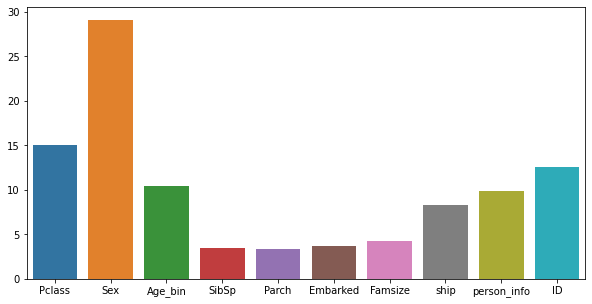

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x_val.columns, model.feature_importances_)

- 드라마틱하게 검증데이터의 정확도가 변하진 않는다.
- 결측치처리/전처리, 변수생성에서 부족한듯
- 시도한것에 의미를 두는걸로..
